In [1]:
# Importing Packages
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
# Set all the constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
data_dir = '/content/drive/My Drive/Potato_img/'

In [6]:
# Loading the data using Image Data Generator

train_datagen = ImageDataGenerator(
    rescale = 1./255, # It is a process of making all input values within similer numerical range.
                     # It leads to faster computation and optimization process.
    horizontal_flip = True, # It varies leftside, rightside of image orientation. It is common data augmentation technique used to increase the variability of training data
                            # without changing its semantic content of images. It helps the model to recognize features from
                            # different orientations or viewpoints.It reduces overfitting.
                            # vertical flip means top to bottam orientation of image.
    rotation_range = 10, # It randomly rotates images from 0 degree to 360 degree for Data augmentation purpose.
    validation_split=0.2  # Set validation split
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode='sparse', # since we have 3 class labels, we r using 'sparse'. It gives single integer output[0,1,2]. 
                         #If we hv only 2 classes, then we use 'binary' [0,1]
                         # here we can also use 'categorical', it gives one hot encoded outputs[0,0,1]
    subset='training', # set as training data
    # save_to_dir = 'D:/Downloads/train_aug_potato' # use this code if you want to save all augmented images.
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
    subset = 'validation' # set as test data
)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
# To view data present in train_generator:
# since it is a data_generator, we hv to use for loop and break.
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.6427802  0.6310155  0.69768214]
  [0.4172291  0.40546438 0.47213104]
  [0.430342   0.41857728 0.48524395]
  ...
  [0.75792456 0.754003   0.80890495]
  [0.7550373  0.75111574 0.8060177 ]
  [0.75215    0.74822843 0.8031304 ]]

 [[0.6691267  0.657362   0.72402865]
  [0.42336455 0.41159984 0.4782665 ]
  [0.40904823 0.39728352 0.4639502 ]
  ...
  [0.7242993  0.72037774 0.7752797 ]
  [0.7188857  0.71496415 0.7698661 ]
  [0.71347207 0.7095505  0.76445246]]

 [[0.69547313 0.6837084  0.7503751 ]
  [0.42950004 0.41773534 0.484402  ]
  [0.3877545  0.37598976 0.44265646]
  ...
  [0.6725334  0.6686118  0.7235138 ]
  [0.6746989  0.6707773  0.7256793 ]
  [0.6768643  0.67294276 0.7278447 ]]

 ...

 [[0.39267796 0.38483483 0.46823376]
  [0.39520434 0.3873612  0.47039923]
  [0.3977307  0.38988757 0.47256473]
  ...
  [0.38781714 0.39566028 0.48585635]
  [0.37647063 0.38431376 0.47450984]
  [0.46913713 0.47698027 0.56717634]]

 [[0.3971411  0.38929796 0.4716509 ]
  [0.39678022 0.3889371  0.47129002]


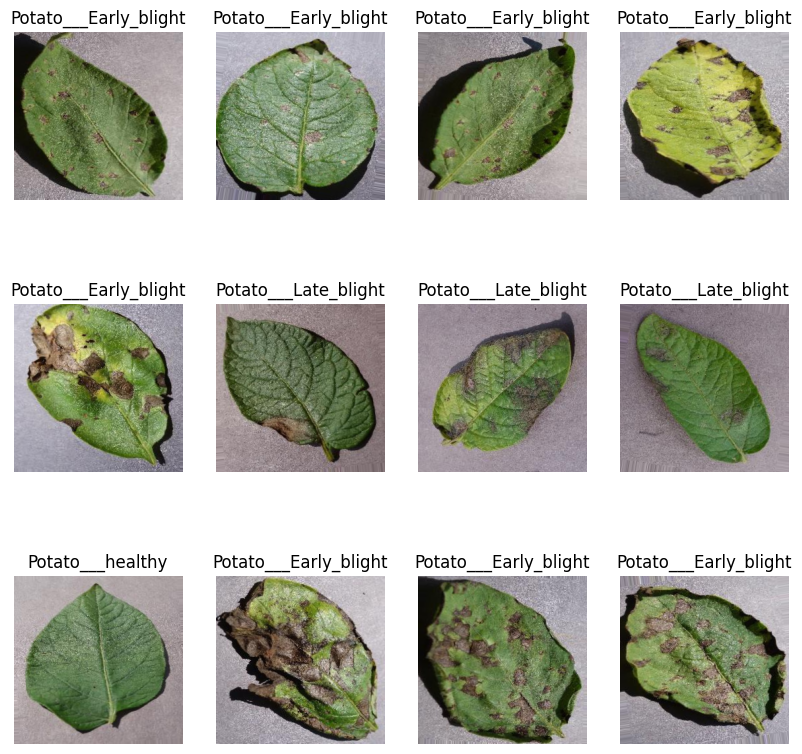

In [10]:
# Visualisation of Images from Datas in image data generator:
plt.figure(figsize=(10, 10))
for i in range(12):
    img, label = train_generator.next() # train_generotor yields batches of data.
                                    # next() method returns the next element in the sequence(batches) generated by generator.
    ax = plt.subplot(3,4, i + 1)  # Here in subplot grid (3-no of rows, 4 - no of columns, i= which index to work on)
    plt.imshow(img[0])
    plt.title(class_names[int(label[0])])
    plt.axis("off")
plt.show()

In [11]:
# Model Architecture
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'), # It is a convolutional 2D layer, 
                                                               #no_of_filter=32, filter_size=3*3, 
                                                              #finally Applying relu= Rectified_linear_unit to its output.
    layers.MaxPooling2D((2, 2)),  # Max pool layer with (2*2)window. It retains max value from each 2*2 region of input 
                                  #and discards the rest
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [13]:
# compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
steps_per_epoch_for_train = 1722/32

In [15]:
steps_per_epoch_for_train

53.8125

In [16]:
steps_per_epoch_for_test = 430/32

In [17]:
steps_per_epoch_for_test

13.4375

In [22]:
# Training the Model

history = model.fit(
    train_generator,
    steps_per_epoch=53,  # No need to assign this value. Model calculates it automatically. here it is 53 images in each batch
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=13,  #No need to assign this value. Model calculates it automatically 13 images in each batch
    verbose=1,
    epochs=3, # in high gpus, u can use 50 epochs
)

Epoch 1/3
53/53 [==============================] - 43s 806ms/step - loss: 0.3895 - accuracy: 0.8527 - val_loss: 0.2595 - val_accuracy: 0.9087
Epoch 2/3
53/53 [==============================] - 38s 727ms/step - loss: 0.2910 - accuracy: 0.8917 - val_loss: 0.2883 - val_accuracy: 0.8870
Epoch 3/3
53/53 [==============================] - 39s 731ms/step - loss: 0.1874 - accuracy: 0.9290 - val_loss: 0.1333 - val_accuracy: 0.9591


In [23]:
# You can see above that we get 95% accuracy for our test dataset. This is considered to be a pretty good accuracy
# If you run more epochs, then accuracy will increase correspondingly.

In [24]:
history.history

{'loss': [0.38949164748191833, 0.2909649908542633, 0.18738579750061035],
 'accuracy': [0.8526627421379089, 0.8917160034179688, 0.9289940595626831],
 'val_loss': [0.2594892084598541, 0.2883211374282837, 0.13328811526298523],
 'val_accuracy': [0.9086538553237915, 0.8870192170143127, 0.9591346383094788]}

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

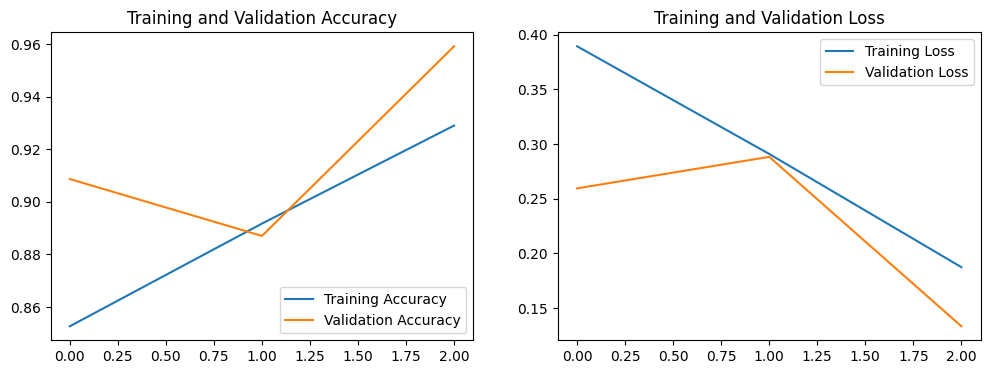

In [26]:
# Plotting Accuracy and loss of training and test dataset for each epochs:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(3), acc, label='Training Accuracy')
plt.plot(range(3), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(3), loss, label='Training Loss')
plt.plot(range(3), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

actual label: Potato___Early_blight
1/1 [==============================] - 0s 167ms/step
predicted label: Potato___Early_blight


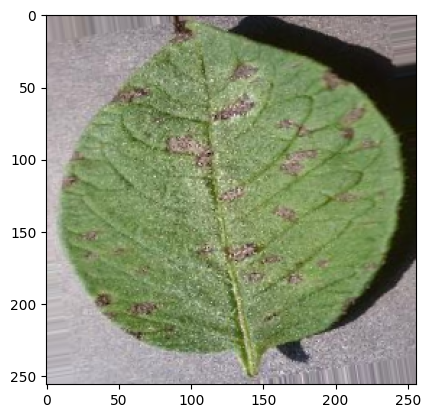

In [27]:
# Prediction on sample image

import numpy as np
for image_batch, label_batch in validation_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

In [28]:
# Creating a function for Prediction inference:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [29]:
# Using Inference funtion to predict some images:

plt.figure(figsize=(15, 15))
for images, labels in validation_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.

In [31]:
# Saving the model
# Creating a model version so that Each time, when you save a model,
# It will save as new file by checking all existing files in that directory
import os
model_version=max([int(i) for i in os.listdir('/content/drive/My Drive/Potato_save/') + [0]])+1
model.save(f'/content/drive/My Drive/Potato_save/{model_version}/')

In [32]:
# Save model in h5 format so that there is just one file and we can upload that to GCP conveniently
model.save('/content/drive/My Drive/Potato_save/potatos.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
